In [1]:
import pandas as pd
from datetime import datetime,date
import matplotlib.pyplot as plt
import seaborn as sns
import requests, json
import matplotlib.dates as mdates
import numpy as np
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')
#pd.__version__

## Import the latest data 

The data is imported from the covidtracking.com website. 

The column Deaths per Positive case (DperP) is added. 

In [2]:
url = 'https://covidtracking.com/api/v1/states/daily.json'

r = requests.get(url)

json_data = r.json()

df = pd.json_normalize(json_data)
df['DperP'] = df['death']/df['positive']
df['PosPerTest']= df['positiveIncrease']/df['totalTestResultsIncrease']
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%d')

#df.head()

## Subset the data for specific states 
### First we look at Utah, where I live

In [3]:
UT = df[df['state']=='UT']
#UT.deathIncrease.value_counts()

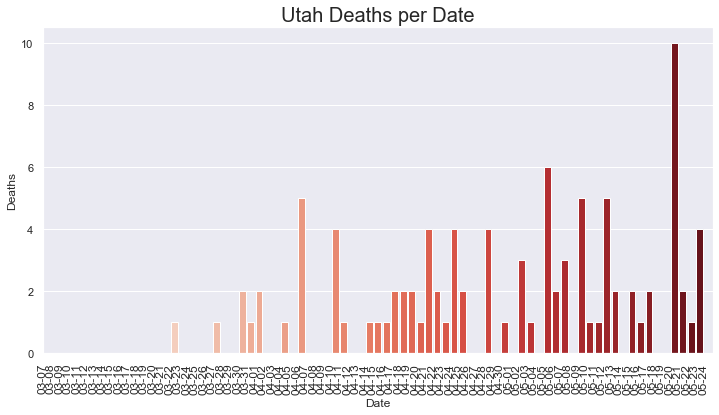

In [4]:
sns.set()

fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = 'date', y = 'deathIncrease', data = UT, palette = 'Reds')

x_dates = UT['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Utah Deaths per Date', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Deaths', fontdict={'fontsize':12})

#plt.savefig('Utah Deaths per Date.png')

plt.show()

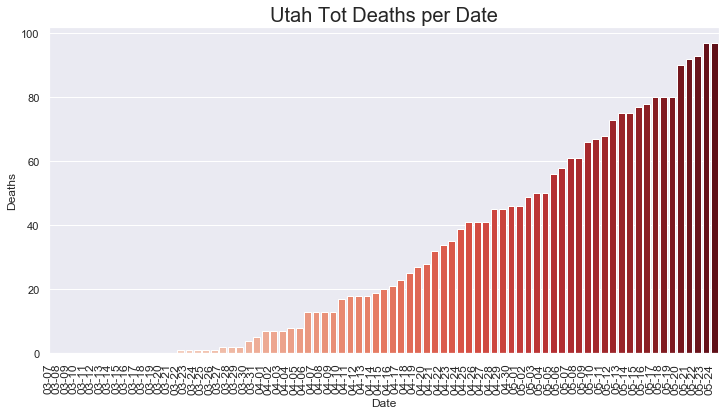

In [5]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = 'date', y = 'death', data = UT, palette = 'Reds')

x_dates = UT['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Utah Tot Deaths per Date', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Deaths', fontdict={'fontsize':12})

#plt.savefig('Utah Tot Deaths per Date.png')

plt.show()

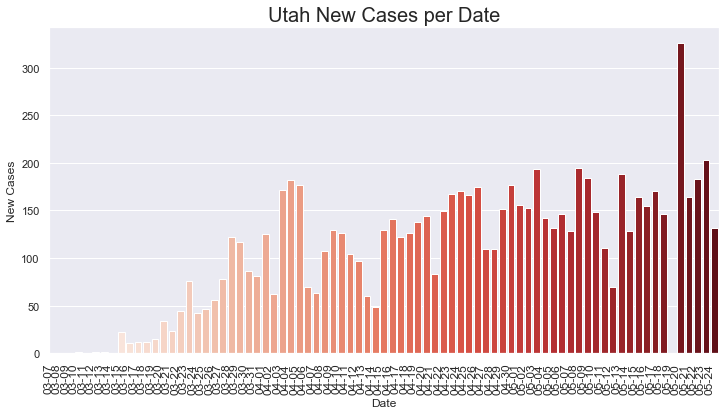

In [6]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = 'date', y = 'positiveIncrease', data = UT, palette = 'Reds')

x_dates = UT['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Utah New Cases per Date', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('New Cases', fontdict={'fontsize':12})

#plt.savefig('Utah New Cases per Date.png')
plt.show()

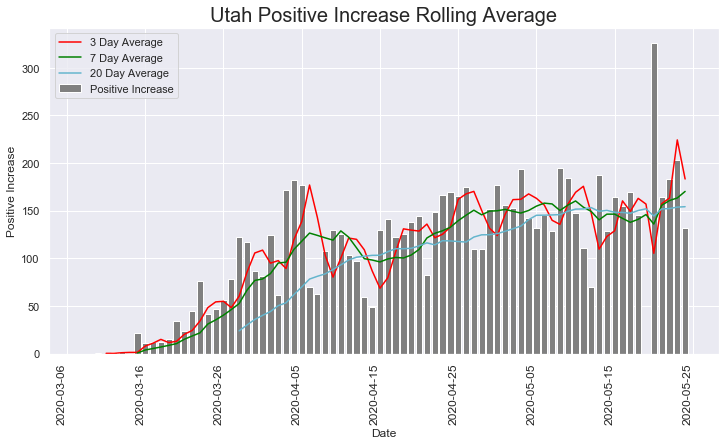

In [7]:
UT['rolling_mean'] = UT.loc[:,'positiveIncrease'].rolling(3).mean().shift(periods=-3)
UT['rolling_mean2'] = UT.loc[:,'positiveIncrease'].rolling(7).mean().shift(periods=-7)
UT['rolling_mean3'] = UT.loc[:,'positiveIncrease'].rolling(20).mean().shift(periods=-20)
#x_dates = UT['date'].dt.strftime('%m-%d').sort_values().unique()
UT['date_ordinal'] = pd.to_datetime(UT['date']).apply(lambda date: date.toordinal())

fig, ax = plt.subplots(figsize = (12,6))
plt.bar(UT['date_ordinal'], UT['positiveIncrease'], label='Positive Increase',color='grey')
plt.plot(UT['date_ordinal'], UT.rolling_mean, label='3 Day Average', color='red')
plt.plot(UT['date_ordinal'], UT.rolling_mean2, label='7 Day Average', color='green')
plt.plot(UT['date_ordinal'], UT.rolling_mean3, label='20 Day Average', color='c')
plt.legend(loc='upper left')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(labels=new_labels, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Utah Positive Increase Rolling Average', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Positive Increase', fontdict={'fontsize':12})
plt.axis('tight')
plt.savefig('UtahPositiveRolling.png')
plt.show()

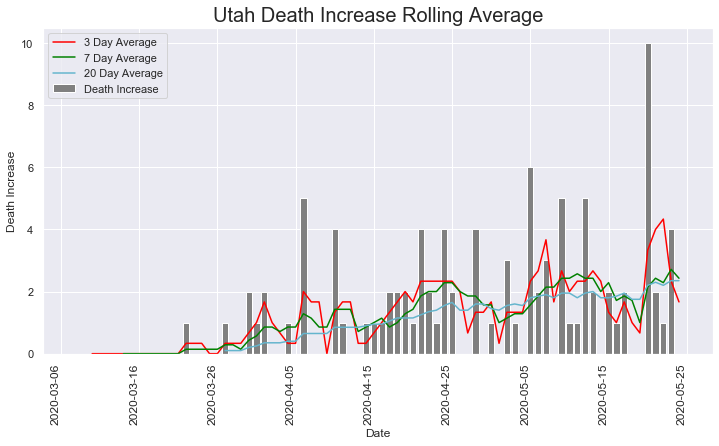

In [8]:
UT['rolling_mean_d'] = UT.loc[:,'deathIncrease'].rolling(3).mean().shift(periods=-2)
UT['rolling_mean_d2'] = UT.loc[:,'deathIncrease'].rolling(7).mean().shift(periods=-6)
UT['rolling_mean_d3'] = UT.loc[:,'deathIncrease'].rolling(20).mean().shift(periods=-19)
#x_dates = UT['date'].dt.strftime('%m-%d').sort_values().unique()
UT['date_ordinal'] = pd.to_datetime(UT['date']).apply(lambda date: date.toordinal())

fig, ax = plt.subplots(figsize = (12,6))
plt.bar(UT['date_ordinal'], UT['deathIncrease'], label='Death Increase',color='grey')
plt.plot(UT['date_ordinal'], UT.rolling_mean_d, label='3 Day Average', color='red')
plt.plot(UT['date_ordinal'], UT.rolling_mean_d2, label='7 Day Average', color='green')
plt.plot(UT['date_ordinal'], UT.rolling_mean_d3, label='20 Day Average', color='c')
plt.legend(loc='upper left')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(labels=new_labels, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Utah Death Increase Rolling Average', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Death Increase', fontdict={'fontsize':12})
plt.axis('tight')
plt.savefig('UtahDeathRolling.png')
plt.show()

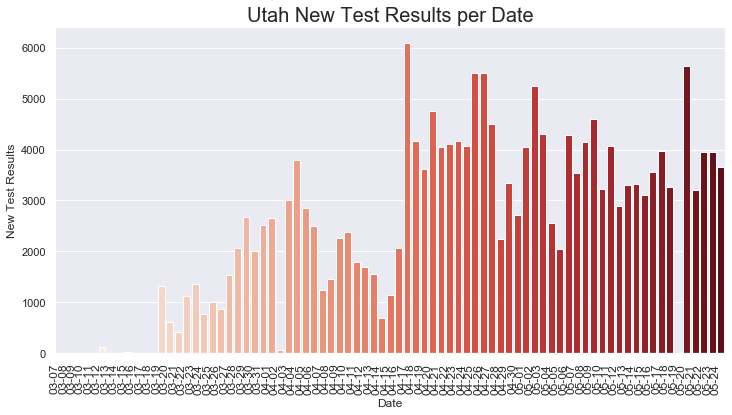

In [9]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = 'date', y = 'totalTestResultsIncrease', data = UT, palette = 'Reds')

x_dates = UT['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Utah New Test Results per Date', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('New Test Results', fontdict={'fontsize':12})

#plt.savefig('Utah New Test Results per Date.png')
plt.show()

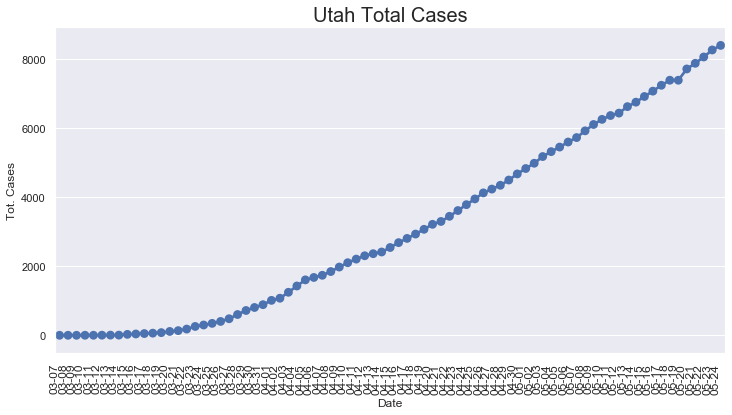

In [10]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.pointplot(x = 'date', y = 'positive', data = UT)

x_dates = UT['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Utah Total Cases', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Tot. Cases', fontdict={'fontsize':12})

#plt.savefig('Utah Total Cases.png')
plt.show()

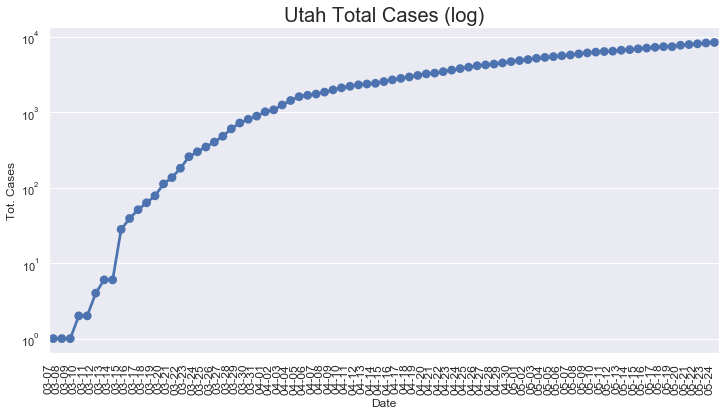

In [11]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.pointplot(x = 'date', y = 'positive', data = UT)

x_dates = UT['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Utah Total Cases (log)', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Tot. Cases', fontdict={'fontsize':12})
ax.set( yscale='log')

#plt.savefig('Utah Total Cases (log).png')
plt.show()

## Investigating the percentage of tests that return positive results:
### If this number remains high it shows that we are not testing enough. 

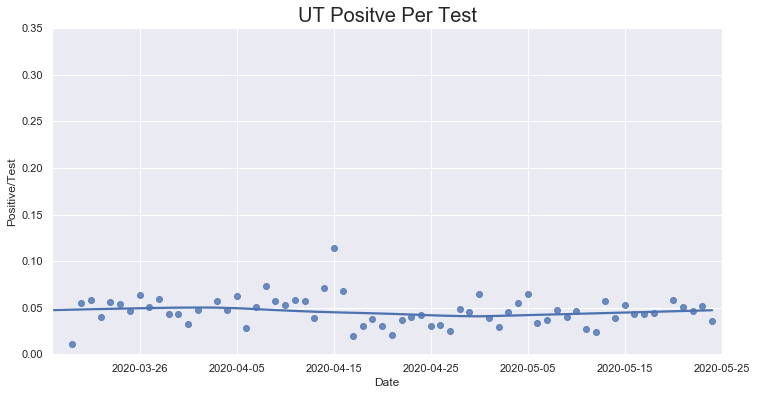

In [12]:
#UT=UT[UT['date']>= '2020-03-29']
UT['date_ordinal'] = pd.to_datetime(UT['date']).apply(lambda date: date.toordinal())


fig, ax = plt.subplots(figsize = (12,6)) 


fig = sns.regplot(x = 'date_ordinal', y = 'PosPerTest', data = UT,lowess=True)
ax.set_xlim(UT['date_ordinal'].min() +10, UT['date_ordinal'].max() + 1)
ax.set_ylim(0,0.35)
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
plt.title('UT Positve Per Test', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Positive/Test', fontdict={'fontsize':12})
ax.set_xticklabels(new_labels)

#plt.savefig('PosPerTest.png')
plt.show()

## Compare stats with Nearest States and States with Similar Case Counts: 

In [13]:
#create more subsetes of data for each state of interest
ID = df[df['state']=='ID']
NM = df[df['state']=='NM']
CO = df[df['state']=='CO']
AZ = df[df['state']=='AZ']

In [14]:
FourC = UT.append(ID).append(CO).append(AZ).append(NM).append(df[df['state']=='NV']).append(df[df['state']=='WY'])

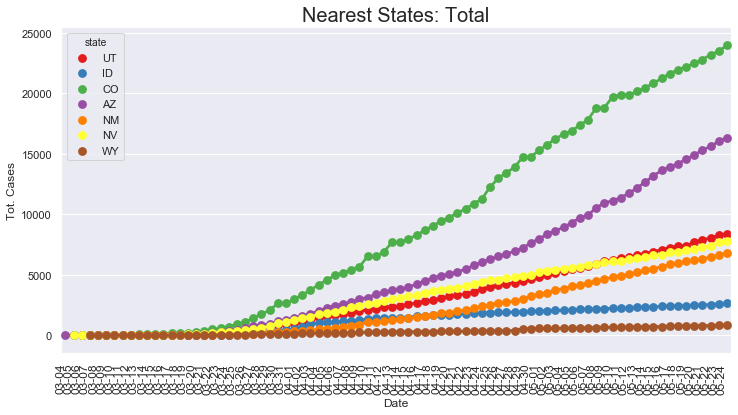

In [15]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.pointplot(x = 'date', y = 'positive',hue='state', data = FourC, palette = 'Set1')

x_dates = FourC['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Nearest States: Total', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Tot. Cases', fontdict={'fontsize':12})

#plt.savefig('Four Corners Total Cases.png')
plt.show()

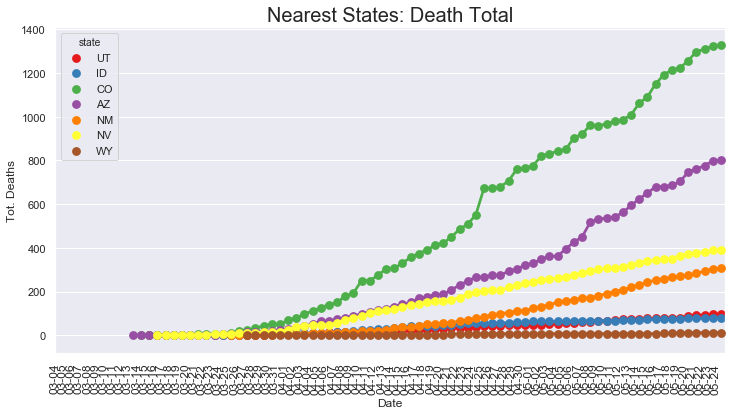

In [16]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.pointplot(x = 'date', y = 'death',hue='state', data = FourC, palette = 'Set1')

x_dates = FourC['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Nearest States: Death Total', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Tot. Deaths', fontdict={'fontsize':12})

#plt.savefig('4C Daily Death Total.png')
plt.show()

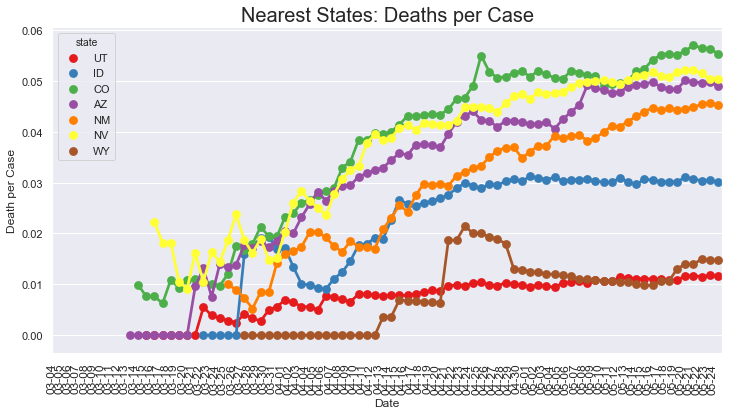

In [17]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.pointplot(x = 'date', y = 'DperP',hue='state', data = FourC, palette = 'Set1')

x_dates = FourC['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Nearest States: Deaths per Case', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Death per Case', fontdict={'fontsize':12})

#plt.savefig('4C + ID & NV Deaths per Case.png')
plt.show()

In [18]:
simCase = UT.append(df[df['state']=='KY']).append(df[df['state']=='NV']).append(df[df['state']=='OK'])

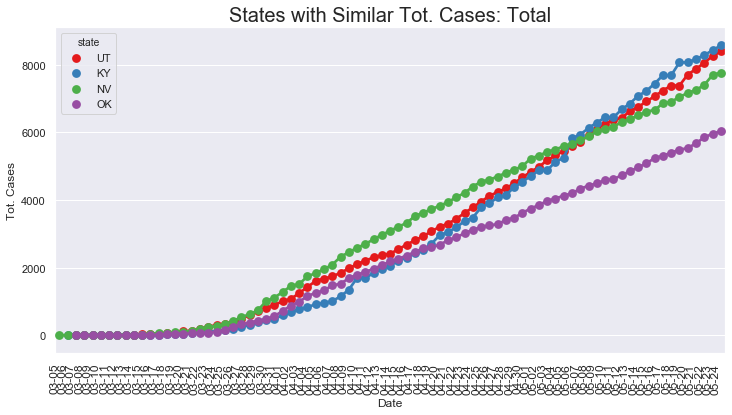

In [19]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.pointplot(x = 'date', y = 'positive',hue='state', data = simCase, palette = 'Set1')

x_dates = simCase['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('States with Similar Tot. Cases: Total', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Tot. Cases', fontdict={'fontsize':12})

#plt.savefig('Similar Cases Totals.png')
plt.show()

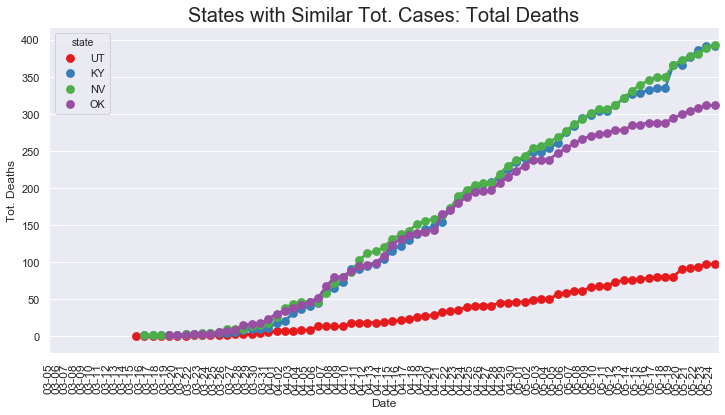

In [20]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.pointplot(x = 'date', y = 'death',hue='state', data = simCase, palette = 'Set1')

x_dates = simCase['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('States with Similar Tot. Cases: Total Deaths', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Tot. Deaths', fontdict={'fontsize':12})

#plt.savefig('Similar Cases Death.png')
plt.show()

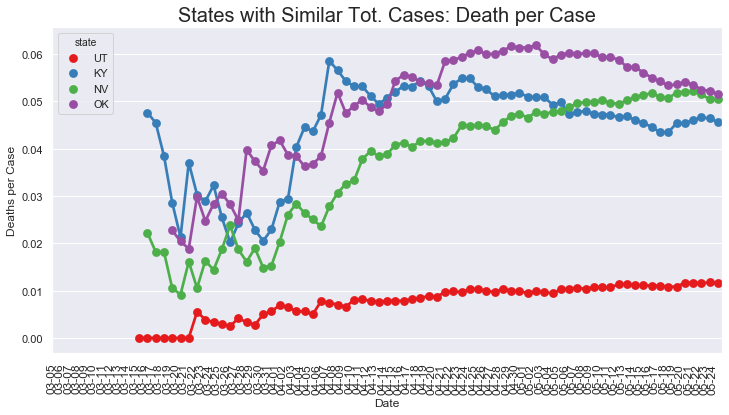

In [21]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.pointplot(x = 'date', y = 'DperP',hue='state', data = simCase, palette = 'Set1')

x_dates = simCase['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('States with Similar Tot. Cases: Death per Case', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Deaths per Case', fontdict={'fontsize':12})

#plt.savefig('Similar Cases tot. Deaths per Case.png')
plt.show()

In [22]:
df_1 = df[df['state']=='WA'].append(df[df['state']=='GA']).append(df[df['state']=='MI'])
df_1['date_ordinal'] = pd.to_datetime(df_1['date']).apply(lambda date: date.toordinal())


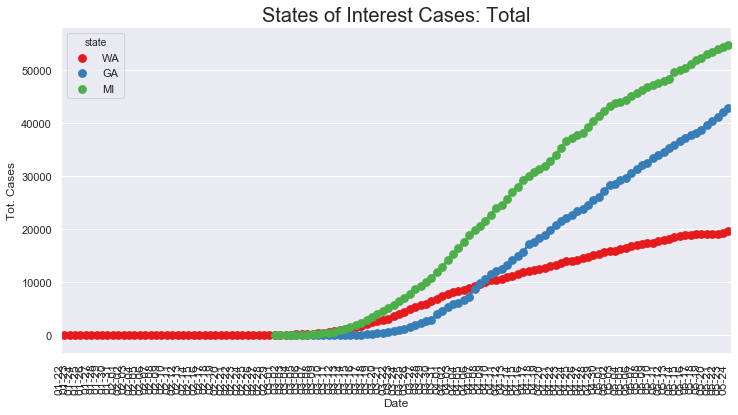

In [23]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.pointplot(x = 'date', y = 'positive',hue='state', data = df_1, palette = 'Set1')
x_dates = df_1['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('States of Interest Cases: Total', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Tot. Cases', fontdict={'fontsize':12})


#plt.savefig('States of Interest Cases Totals.png')
plt.show()

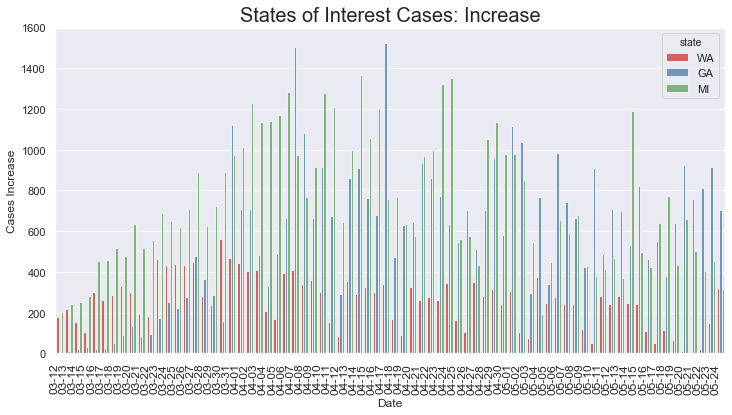

In [24]:
fig, ax = plt.subplots(figsize = (12,6))    
df_2=df_1[df_1['date']>= '2020-03-12']
fig = sns.barplot(x = 'date', y = 'positiveIncrease',hue='state', data = df_2, palette = 'Set1',alpha=.75)
x_dates = df_2['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('States of Interest Cases: Increase', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Cases Increase', fontdict={'fontsize':12})

#plt.savefig('States of Interest Cases Increase.png')
plt.show()

In [25]:
df_2['date_ordinal'] = pd.to_datetime(df_2['date']).apply(lambda date: date.toordinal())
#df_2['date_ordinal']
#fig = sns.barplot(x = 'date', y = 'positiveIncrease',hue='state', data = df_2, palette = 'Set1',alpha=.75)

#date.fromordinal()
#[date.fromordinal(item) for item in ax.get_xticks()]

In [26]:
date.fromordinal(737554)

datetime.date(2020, 5, 9)

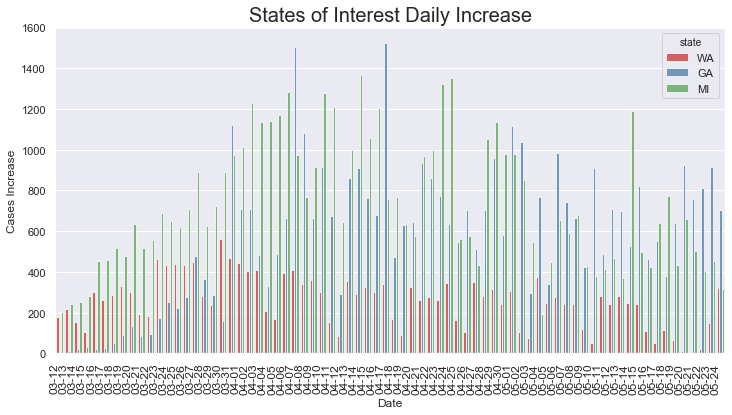

In [27]:
fig, ax = plt.subplots(figsize = (12,6))    

fig = sns.barplot(x = 'date', y = 'positiveIncrease',hue='state', data = df_2, palette = 'Set1',alpha=.75)
x_dates = df_2['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('States of Interest Daily Increase', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Cases Increase', fontdict={'fontsize':12})


#plt.savefig('States of Interest Cases Increase.png')
plt.show()

In [28]:
CA = df[df['state']=='CA']
#CA.head()

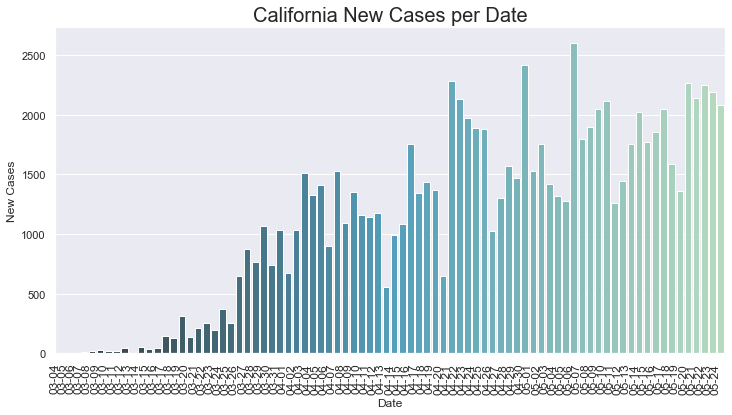

In [29]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = 'date', y = 'positiveIncrease', data = CA, palette = 'GnBu_d')

x_dates = CA['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('California New Cases per Date', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('New Cases', fontdict={'fontsize':12})

#plt.savefig('CA New Cases per Date.png')
plt.show()

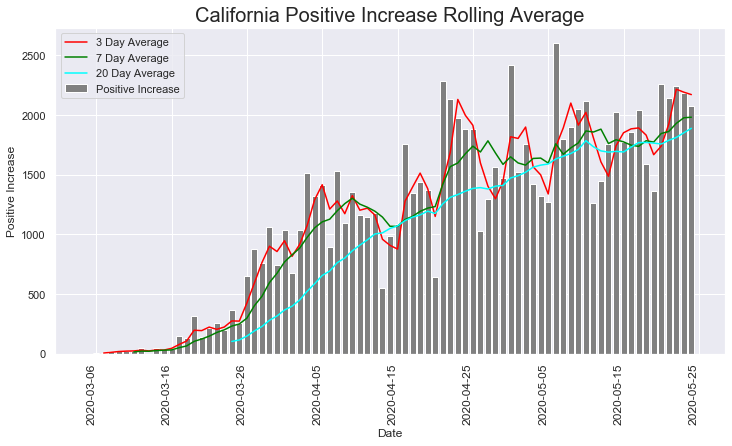

In [30]:
CA['rolling_mean'] = CA.loc[:,'positiveIncrease'].rolling(3).mean().shift(periods=-2)
CA['rolling_mean2'] = CA.loc[:,'positiveIncrease'].rolling(7).mean().shift(periods=-6)
CA['rolling_mean3'] = CA.loc[:,'positiveIncrease'].rolling(20).mean().shift(periods=-19)
#x_dates = UT['date'].dt.strftime('%m-%d').sort_values().unique()
CA['date_ordinal'] = pd.to_datetime(CA['date']).apply(lambda date: date.toordinal())

fig, ax = plt.subplots(figsize = (12,6))
plt.bar(CA['date_ordinal'], CA['positiveIncrease'], label='Positive Increase',color='grey')
plt.plot(CA['date_ordinal'], CA.rolling_mean, label='3 Day Average', color='red')
plt.plot(CA['date_ordinal'], CA.rolling_mean2, label='7 Day Average', color='green')
plt.plot(CA['date_ordinal'], CA.rolling_mean3, label='20 Day Average', color='cyan')
plt.legend(loc='upper left')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(labels=new_labels, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('California Positive Increase Rolling Average', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Positive Increase', fontdict={'fontsize':12})
plt.axis('tight')
plt.show()

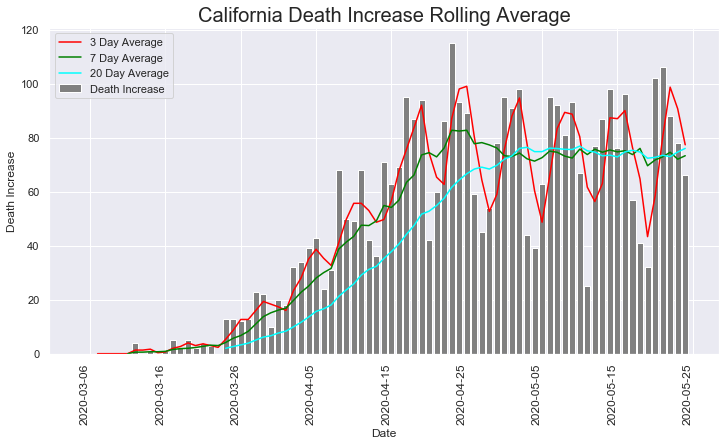

In [31]:
CA['rolling_mean_d'] = CA.loc[:,'deathIncrease'].rolling(3).mean().shift(periods=-2)
CA['rolling_mean_d2'] = CA.loc[:,'deathIncrease'].rolling(7).mean().shift(periods=-6)
CA['rolling_mean_d3'] = CA.loc[:,'deathIncrease'].rolling(20).mean().shift(periods=-19)
#x_dates = UT['date'].dt.strftime('%m-%d').sort_values().unique()
CA['date_ordinal'] = pd.to_datetime(CA['date']).apply(lambda date: date.toordinal())

fig, ax = plt.subplots(figsize = (12,6))
plt.bar(CA['date_ordinal'], CA['deathIncrease'], label='Death Increase',color='grey')
plt.plot(CA['date_ordinal'], CA.rolling_mean_d, label='3 Day Average', color='red')
plt.plot(CA['date_ordinal'], CA.rolling_mean_d2, label='7 Day Average', color='green')
plt.plot(CA['date_ordinal'], CA.rolling_mean_d3, label='20 Day Average', color='cyan')
plt.legend(loc='upper left')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(labels=new_labels, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('California Death Increase Rolling Average', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Death Increase', fontdict={'fontsize':12})
plt.axis('tight')
plt.show()



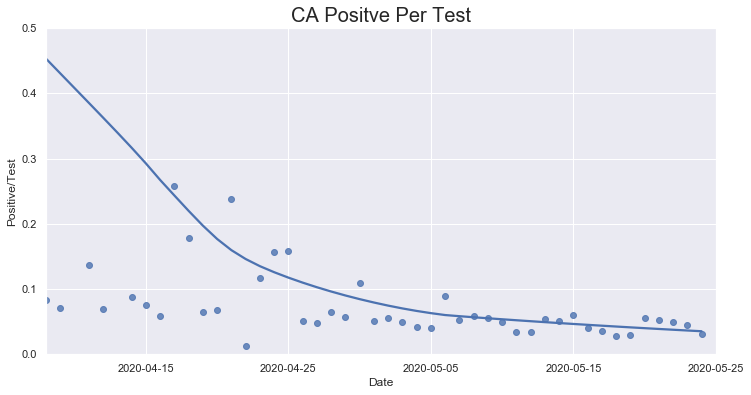

In [32]:
CA_1=CA[CA['date']>= '2020-03-29']
CA_1['date_ordinal'] = pd.to_datetime(CA_1['date']).apply(lambda date: date.toordinal())


fig, ax = plt.subplots(figsize = (12,6)) 


fig = sns.regplot(x = 'date_ordinal', y = 'PosPerTest', data = CA_1, lowess=True)
ax.set_xlim(CA_1['date_ordinal'].min() +10, CA_1['date_ordinal'].max() + 1)
ax.set_ylim(0,0.5)
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
plt.title('CA Positve Per Test', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Positive/Test', fontdict={'fontsize':12})
ax.set_xticklabels(new_labels)

#plt.savefig('PosPerTest.png')
plt.show()